In [3]:
!pip install 'transformers[sentencepiece]'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 8.5 MB/s eta 0:00:0000:0100:01


In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
import sentencepiece
from transformers import pipeline
pipe = pipeline("translation", model="Helsinki-NLP/opus-mt-en-fr")

config.json:   0%|          | 0.00/1.42k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/301M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/778k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/802k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.34M [00:00<?, ?B/s]

In [6]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
tokenizer = AutoTokenizer.from_pretrained("Helsinki-NLP/opus-mt-en-fr")
model = AutoModelForSeq2SeqLM.from_pretrained("Helsinki-NLP/opus-mt-en-fr")

In [7]:
!pip install transformers torch

In [12]:
import torch

In [16]:
def model1(sentence):
    tokenizer = AutoTokenizer.from_pretrained("Helsinki-NLP/opus-mt-en-fr")
    model = AutoModelForSeq2SeqLM.from_pretrained("Helsinki-NLP/opus-mt-en-fr")

      # Tokenize the sentences
    encoded_english = tokenizer.prepare_seq2seq_batch(sentence, return_tensors="pt")

      # Perform translation
    with torch.no_grad():
        translations = model.generate(**encoded_english)

      # Decode and display translations
    decoded_translations = tokenizer.batch_decode(translations, skip_special_tokens=True)
    for french_translation in decoded_translations:
        print(f"French: {french_translation}\n")

In [17]:
Sen = "I Study in UNH. This is my third semester in University"

In [18]:
model1(Sen)

French: J'étudie à l'UNH. C'est mon troisième semestre à l'Université



In [21]:
def Model2(sentence):
    tokenizer = AutoTokenizer.from_pretrained("Helsinki-NLP/opus-mt-en-de")
    model = AutoModelForSeq2SeqLM.from_pretrained("Helsinki-NLP/opus-mt-en-de")

  # Tokenize the sentences
    encoded_english = tokenizer.prepare_seq2seq_batch(sentence, return_tensors="pt")

  # Perform translation
    with torch.no_grad():
        translations = model.generate(**encoded_english)

  # Decode and display translations
    decoded_translations = tokenizer.batch_decode(translations, skip_special_tokens=True)
    for german_translation in decoded_translations:
        print(f"German: {german_translation}\n")


In [22]:
Model2(Sen)

German: Ich studiere in UNH. Dies ist mein drittes Semester in der Universität



In [23]:
def Model3(sentence):
    tokenizer = AutoTokenizer.from_pretrained("Helsinki-NLP/opus-mt-en-es")
    model = AutoModelForSeq2SeqLM.from_pretrained("Helsinki-NLP/opus-mt-en-es")

  # Tokenize the sentences
    encoded_french = tokenizer.prepare_seq2seq_batch(sentence, return_tensors="pt")

  # Perform translation
    with torch.no_grad():
        translations = model.generate(**encoded_french)

  # Decode and display translations
    decoded_translations = tokenizer.batch_decode(translations, skip_special_tokens=True)
    for  spanish_translation in  decoded_translations:
        print(f"Spanish: {spanish_translation}\n")

In [24]:
Model3(Sen)

tokenizer_config.json:   0%|          | 0.00/44.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.47k [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/802k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/826k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.59M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/312M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

Spanish: Estudio en la UNH. Este es mi tercer semestre en la Universidad



In [25]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification,AdamW, get_linear_schedule_with_warmup

In [26]:
save_path='/Users/konishbharathrajjonnalagadda/Desktop/UNH/NLP/final project/saved_models'

In [46]:
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

In [47]:
model = BertForSequenceClassification.from_pretrained(save_path)

In [54]:
def predict_sarcasm(statement,model,tokenizer):
    # Tokenize the statement
    inputs = tokenizer(statement, truncation=True, padding=True, max_length=128, return_tensors="pt")

    # Make the prediction
    with torch.no_grad():
        outputs = model(**inputs)
    
    logits = outputs.logits
    #predicted_label = torch.argmax(logits).item()
    predicted_label=torch.nn.Softmax()(logits)

    return predicted_label


In [55]:
statement = "Breaking News: World Shocked to Discover That Mondays Are, in Fact, Everyone's Favorite Day!"

In [56]:
predict_sarcasm(statement,model,tokenizer)

tensor([[0.2981, 0.7019]])

In [59]:
tensor_values = predict_sarcasm(statement,model,tokenizer)
tensor_values = tensor_values.numpy()
tensor_values

array([[0.29809934, 0.70190066]], dtype=float32)

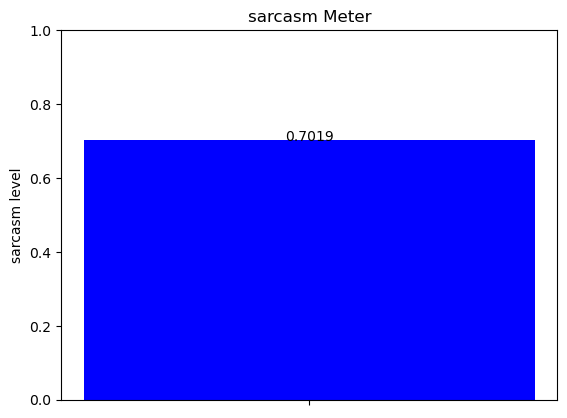

In [60]:
import numpy as np
import matplotlib.pyplot as plt

# Your NumPy array
numpy_array = tensor_values

# Extract the second element
value_to_visualize = numpy_array[0, 1]

# Create a vertical bar chart
plt.bar([''], [value_to_visualize], color='blue')

# Customize the plot
plt.ylim(0, 1)  # Set the y-axis limit from 0 to 1
plt.ylabel('sarcasm level')  # Label for the y-axis
plt.title('sarcasm Meter')  # Title for the plot

# Display the value on the bar
plt.text(0, value_to_visualize, f'{value_to_visualize:.4f}', ha='center', color='black')

# Show the plot
plt.show()

In [76]:
import numpy as np
import matplotlib.pyplot as plt

def sarcasm_meter(tensor_values):


    # Your NumPy array
    numpy_array = tensor_values

    # Extract the second element
    value_to_visualize = numpy_array[0, 1]

    # Create a vertical bar chart
    plt.bar([''], [value_to_visualize], color='blue')

    # Customize the plot
    plt.ylim(0, 1)  # Set the y-axis limit from 0 to 1
    plt.ylabel('sarcasm level')  # Label for the y-axis
    plt.title('sarcasm Meter')  # Title for the plot

    # Display the value on the bar
    plt.text(0, value_to_visualize, f'{value_to_visualize:.4f}', ha='center', color='black')

    # Show the plot
    plt.show()

In [89]:
def sentence_translation_and_sarcasm_detection(sentence):
    model1(sentence)
    Model2(sentence)
    Model3(sentence)
    
    save_path='/Users/konishbharathrajjonnalagadda/Desktop/UNH/NLP/final project/saved_models'
    tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
    model = BertForSequenceClassification.from_pretrained(save_path)
    
    tensor_values = predict_sarcasm(sentence,model,tokenizer)
    tensor_values = tensor_values.numpy()
    
    sarcasm_meter(tensor_values)
    return tensor_values
    

In [92]:
sentence = "popeye decries mideast bombings; 'dese bombinks is disgustipating,' says sailor man"

French: "Les bombes du désert sont dégoûtantes," dit l'homme marin.

German: Popeye decryes Mideast Bombardierungen; "Dese bombinks ist ekelhaft", sagt Matrose Mann

Spanish: popeye decrece bombardeos en el medio oriente; "los bombinks dese es repugnante", dice el marinero



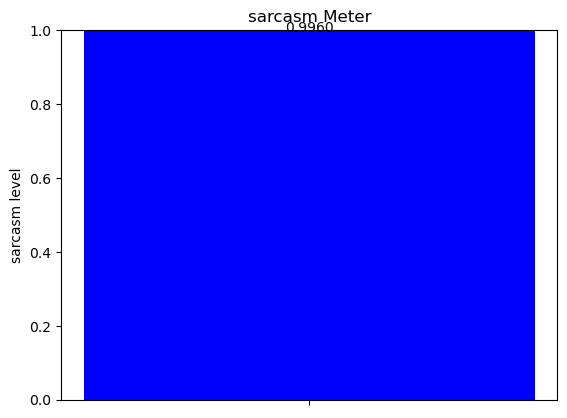

array([[0.00404085, 0.9959591 ]], dtype=float32)

In [93]:
sentence_translation_and_sarcasm_detection(sentence)